# Logistic Regression

In [ ]:
from sklearn import datasets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

np.set_printoptions(precision=5, suppress=True)

## 1. Data preparation

In [ ]:
cancer = datasets.load_breast_cancer()
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [ ]:
print(cancer)

{'data': array([[ 17.99   ,  10.38   , 122.8    , ...,   0.2654 ,   0.4601 ,
          0.1189 ],
       [ 20.57   ,  17.77   , 132.9    , ...,   0.186  ,   0.275  ,
          0.08902],
       [ 19.69   ,  21.25   , 130.     , ...,   0.243  ,   0.3613 ,
          0.08758],
       ...,
       [ 16.6    ,  28.08   , 108.3    , ...,   0.1418 ,   0.2218 ,
          0.0782 ],
       [ 20.6    ,  29.33   , 140.1    , ...,   0.265  ,   0.4087 ,
          0.124  ],
       [  7.76   ,  24.54   ,  47.92   , ...,   0.     ,   0.2871 ,
          0.07039]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
 

In [ ]:
X = cancer.data
y = cancer.target
m, n = X.shape
print(m, n)
X

569 30


array([[ 17.99   ,  10.38   , 122.8    , ...,   0.2654 ,   0.4601 ,
          0.1189 ],
       [ 20.57   ,  17.77   , 132.9    , ...,   0.186  ,   0.275  ,
          0.08902],
       [ 19.69   ,  21.25   , 130.     , ...,   0.243  ,   0.3613 ,
          0.08758],
       ...,
       [ 16.6    ,  28.08   , 108.3    , ...,   0.1418 ,   0.2218 ,
          0.0782 ],
       [ 20.6    ,  29.33   , 140.1    , ...,   0.265  ,   0.4087 ,
          0.124  ],
       [  7.76   ,  24.54   ,  47.92   , ...,   0.     ,   0.2871 ,
          0.07039]])

In [ ]:
# feature scaling
scaler = StandardScaler()
X = scaler.fit_transform(X, y)
X

array([[ 1.09706, -2.07334,  1.26993, ...,  2.29608,  2.75062,  1.93701],
       [ 1.82982, -0.35363,  1.68595, ...,  1.08708, -0.24389,  0.28119],
       [ 1.57989,  0.45619,  1.5665 , ...,  1.955  ,  1.15226,  0.20139],
       ...,
       [ 0.70228,  2.04557,  0.67268, ...,  0.41407, -1.10455, -0.31841],
       [ 1.83834,  2.33646,  1.98252, ...,  2.28999,  1.91908,  2.21964],
       [-1.8084 ,  1.22179, -1.81439, ..., -1.74506, -0.04814, -0.75121]])

In [ ]:
# add intercept term to X
X = np.concatenate([np.ones((m, 1)), X], axis=1)

## 2. Sigmoid Function: $g(z) = \frac{1}{1 + e^{-z}}$

In [ ]:
def sigmoid(z):
    # z = np.array(z)
    g = 1 / (1 + np.exp(-z))
    return g

In [ ]:
print(sigmoid(36))
print(sigmoid(37))

0.9999999999999998
1.0


In [ ]:
print(sigmoid(-709))
print(sigmoid(-710))

1.216780750623423e-308
0.0


<ipython-input-7-dee653d9ce49>:3: RuntimeWarning: overflow encountered in exp
  g = 1 / (1 + np.exp(-z))


In [ ]:
np.log(0)

<ipython-input-10-f6e7c0610b57>:1: RuntimeWarning: divide by zero encountered in log
  np.log(0)


-inf

## 3. Cost Function:
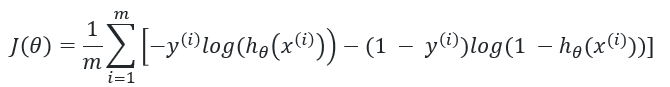

In [ ]:
eps = 1e-4

def cost_func(X, y, theta):
    m = y.size
    z = X.dot(theta)
    h = sigmoid(z)
    # add eps to deal with log(0)
    loss = (-y.dot(np.log(h + eps)) - (1 - y).dot(np.log(1 - h + eps))) / m
    return loss

In [ ]:
# initializing parameters
theta = np.zeros(31)
iters = 5000;
lr = 5;
# lr = 50, iters = 500000 to get better result

In [ ]:
cost_func(X, y ,theta)

0.6929472005572794

## (Optional) 3. Gradient Descent:
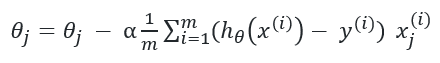

In [ ]:
# vectorization implementation of gradient descent
def grad_descent(X, y, theta, lr, iters):
    m = len(y)
    X_T = X.T
    for i in range(iters):
        h = sigmoid(X.dot(theta))
        delta = X_T.dot(h - y)
        theta -= lr*delta / m
        print(cost_func(X, y, theta))
    return theta

In [ ]:
learned_theta = grad_descent(X, y, theta, lr, iters)

0.3168218764293461
0.18940717793121842
0.11369731471292682
0.09784574050654542
0.08818762265290002
0.08278747160971005
0.07949425335480528
0.07714640086196423
0.07531015283560258
0.07379507038354768
0.07249598243661833
0.07134956523204745
0.0703172964893773
0.06937501550888095
0.068506580803918
0.06770043108266219
0.0669478110423201
0.06624183581915108
0.06557696152916692
0.0649486574443237
0.06435318537409139
0.06378744121578951
0.06324883550721092
0.06273519979292874
0.06224471052999427
0.06177582501749416
0.061327225682981275
0.06089777052459098
0.06048644877777567
0.060092341938231736
0.05971459099945899
0.0593523710000438
0.05900487365185392
0.05867129803893308
0.05835084841738306
0.05804273735817301
0.05774619211486611
0.057460462222121346
0.057184826800352036
0.05691860063383413
0.05666113861535546
0.0564118385178394
0.056170142258902524
0.05593553591052969
0.05570754872225074
0.05548575140892398
0.055269753923733414
0.05505920290290041
0.054853778934660896
0.05465319377303168
0

## 4. Accuracy in Training

In [ ]:
theta

array([-1.74488,  3.43785,  0.19395,  2.91143,  1.10835, -1.55351,
        6.56517, -5.29858, -3.73249,  0.73273, -0.85975, -4.05736,
        1.53081,  2.51895, -6.13154, -1.12784, -3.03356,  4.0326 ,
       -4.43922,  1.17249,  7.29184, -5.09908, -3.9429 , -4.04419,
       -7.01695,  0.66143,  2.65404, -2.96645, -0.09517, -2.22256,
       -4.96117])

In [ ]:
def predict(X, theta):
    pred = np.round(sigmoid(X.dot(theta)))
    return pred

In [ ]:
pred = predict(X, learned_theta)
print("Training Accuracy : {:.2f}%".format(np.mean(pred == y) * 100))

Training Accuracy : 98.95%


In [ ]:
initial_theta = np.zeros(31)
pred = predict(X, initial_theta)
print("Training Accuracy : {:.2f}%".format(np.mean(pred == y) * 100))

Training Accuracy : 37.26%


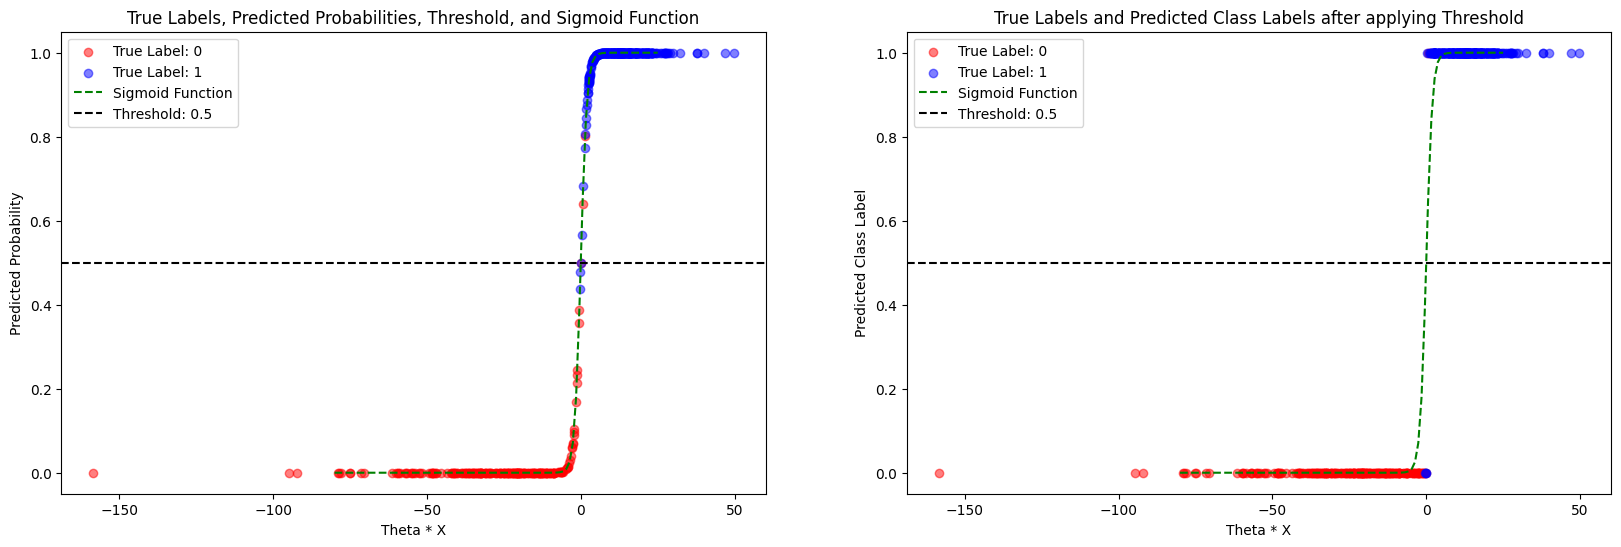

In [ ]:
# Calculate z values (theta * x)
z_values = X.dot(learned_theta)

# Calculate predicted probabilities
pred_proba = sigmoid(z_values)

# Define the threshold
threshold = 0.5

# Calculate predicted class labels
pred_class = np.round(pred_proba)

z_line = np.linspace(-80, 25, 100)
sigmoid_values = sigmoid(z_line)

fig, ax = plt.subplots(1, 2, figsize=(20, 6))
# Plot 1: Predicted Probabilities
ax[0].scatter(z_values[y == 0], pred_proba[y == 0], color='red', label='True Label: 0', alpha=0.5)
ax[0].scatter(z_values[y == 1], pred_proba[y == 1], color='blue', label='True Label: 1', alpha=0.5)
ax[0].plot(z_line, sigmoid_values, label='Sigmoid Function', color='green', linestyle='--')
ax[0].axhline(y=threshold, color='black', linestyle='--', label=f'Threshold: {threshold}')
ax[0].set_xlabel('Theta * X')
ax[0].set_ylabel('Predicted Probability')
ax[0].set_title('True Labels, Predicted Probabilities, Threshold, and Sigmoid Function')
ax[0].legend()

# Plot 2: Predicted Class Labels after applying Threshold
ax[1].scatter(z_values[y == 0], pred_class[y == 0], color='red', label='True Label: 0', alpha=0.5)
ax[1].scatter(z_values[y == 1], pred_class[y == 1], color='blue', label='True Label: 1', alpha=0.5)
ax[1].plot(z_line, sigmoid_values, label='Sigmoid Function', color='green', linestyle='--')
ax[1].axhline(y=threshold, color='black', linestyle='--', label=f'Threshold: {threshold}')
ax[1].set_xlabel('Theta * X')
ax[1].set_ylabel('Predicted Class Label')
ax[1].set_title('True Labels and Predicted Class Labels after applying Threshold')
ax[1].legend()

plt.show()



In [ ]:
# Exercise: Adjust learning rate and number of iterations to see how they will influence the model's performance